# 서약
* 당연한 것을 아래와 같이 한번 다지고 가도록 하겠습니다. 아래 보고서는 **본인의 힘만으로 작성**해야하며, 다른 수강생에게 직접적인 질문, 복사 하는 행위는 모두 금지합니다 
  * 예를 들어서, 본 프로젝트의 코드 셀을 완성하는데 직접적인 질문 또는 복사하는 경우는 모두 금지합니다
  * 수업에서 제공한 코드, 노트북은 모두 재활용가능하며, 카피로 규정하지 않습니다
  * 수업 자료 이외에 참고자료가 있다면, 출처와 사용 부분에 모두 표시하는 경우는 모두 합당한 자료로 인정하겠습니다
  
* 위에 대해서 모두 이해하고 동의했다면, 아래 `서약글`에 다음을 작성해주세요:

"본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우 (제공자 포함) 본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의 합니다."

**서약서**

이름: 이상영

학번: 20185153

서약글:  본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우(제공자 포함)본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의합니다.

# Final Project 

## Project: 새 품종 분류하기

## Due date: 2021.06.15

---

* 아래 여러 셀에서 코드를 완성하는 부분을 수행하고, 설명을 요구하는 부분은 보고서에 설명을 최대한 자세하게 적어주세요. 기준은 본인이 이해하고 있다는 것을 표현할 수 있는 부분을 모두 적으시면 됩니다.
  * 답을 작성하는 원칙은 **보고서**를 작성한다고 생각하시면 됩니다
  * 내가 알고 있는 부분을 충실하게 **글로 표현** 하는 것 또한 중요한 연습입니다 
  * 코드 작성은 **주석**으로 설명하시기 바랍니다
  
  
> **제출방법**: 
* 보고서에는 코드 캡쳐 첨부이외에도, 각 코드를 작성하는 방법론과 설명을 작성해야하는 **서술형 문제**도 포함되어 있습니다.
* 서술형 문제는 채점하는 중요한 기준이 됩니다. 성실하게 작성해주세요.
* 서술형 문제에 대한 답변은 첨부된 보고서에 작성하면 됩니다. 


### 목표: 앱을 위한 인공지능 알고리즘 개발 ^ㅡ^
* 본 보고서에서는 모바일/웹앱을 위한 인공지능 알고리즘을 개발하라는 업무를 부여받았다고 가정합니다
* 프로젝트가 완성본은, 사용자가 제공하는 image를 받아서 새의 종(種)을 예측합니다


---

## Step 0: Import library

- 필요하다 생각되는 라이브러리를 미리 import해 놓은 항목입니다.(참고)
- 필요 없는 라이브러리를 제거하거나 필요한 라이브러리를 추가하셔도 됩니다.

In [1]:
import shutil
import os
import glob
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pandas as pd

from pathlib import Path
from collections import OrderedDict


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import Dataset,DataLoader

import torch.nn as nn
import torch.optim as optim


In [2]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
#train_on_gpu = False

if not train_on_gpu:
    device = 'cpu'
    print('CUDA is not available.  Training on CPU ...')
else:
    device = 'cuda'
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


## Step 1: Dataset 준비하기

In [3]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# num_workers: 병렬적으로 데이터 가지고 올 수 있게, CPU에 있는 여러개의 스레드를 효율적으로 관리할 수 있게함.
# 0으로 하면 알아서 함. 크게 하면 데이터 로드 시 속도 빨라짐. 그대신 training 할때의 자원이 줄어듦.
num_workers = 0
# 한번에 load하는 데이터의 수
batch_size = 128

In [4]:
# dataset을 어떻게 읽을지 설정해주는 class
class train_dataset(Dataset):
    # dataset 전처리
    def __init__(self, imgpath, transform=None):
        self.imgpath = imgpath      # dataset이 있는 경로
        self.transform = transform  # 설정해준 transform 수행
        
    # dataset의 길이 == 총 sample의 수
    def __len__(self):
        return len(self.imgpath)  # dataset에 있는 data의 크기
    
    # dataset에서 하나의 sample을 가져옴
    def __getitem__(self,idx):
        # idenx에 해당하는 이미지를 열어서 'RGB'로 변환
        x = self.transform(Image.open(self.imgpath[idx]).convert('RGB'))
        
        return x

In [5]:
# dataset읽어들일 때, 이미지의 조건을 통일하고 원활한 학습을 위한 설정
train_transform = transforms.Compose([      # sequential하게 다양한 transform 설정
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [6]:
data_dir = "./detect-the-bird/imgs/train" # dataset이 있는 경로
# 디렉토리를 label(class)로 설정하여 data 읽기
train_data = datasets.ImageFolder(data_dir, transform = train_transform)

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 2468
    Root location: ./detect-the-bird/imgs/train
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

## Step 2: Dataset 에 대한 Data Loaders 구성

In [8]:
# obtain training indices that will be used for validation
# percentage of training set to use as validation
valid_size = 0.2

num_train = len(train_data)
# num_train = int(num_train)
indices = list(range(num_train))

# 8:2 로 그냥 나누지 않고 섞어줌.
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


In [9]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

# specify the image classes
classes = train_data.classes
# classes = [i.split('/')[-1] for i in glob.glob('../input/detect-the-bird/imgs/train/*')]

In [10]:
# ImageFolder load후에는 dataloader로 넘김.
# image와 label을 batch로 정리하여 return함.
# dataloader로 받은 return값은 generator
# images, labels = loop or next(iter(dataloader))

# dataloader = torch.utils.data.DataLoader(dataset, batch_size = 64, shuffle=True)

---

## Step 3: Neural Network 생성
- Pretrained model을 허용하지 않습니다. (직접 모델을 설계해 주세요)


In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, 
        # bias=True, padding_mode='zeros')
        # 3x32x32
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # 16x16x16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # 32x8x8
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # 64x4x4
        
        # max pooling layer
        # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.pool = nn.MaxPool2d(2, stride=2)
        
        # 64x4x4 , 500
        self.fc1 = nn.Linear(1024, 500)
        # 500, 15개의 class
        self.fc2 = nn.Linear(500, 15)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        self.relu = nn.ReLU(True)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        
        # flatten image input: [batch_size, channel, image_size]
        # view([batch_size, -1]) 을 해버리면, 제일 마지막 이미지를 불러올 때, batch_size가 아닐 수 있기 때문에 아래와 같이 설정
        x = x.view([-1, 1024])
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = self.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)

        return x

# create a complete CNN
model = ConvNet()

# move tensors to GPU if CUDA is available
# model의 모든 parameter들과 모델 클래스 자체를 device로 옮김.
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=15, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (relu): ReLU(inplace=True)
)

---

 ## Step 4: Cost (Loss) Function 과 Optimizer 선택
 
 [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) 및 [optimizer](http://pytorch.org/docs/stable/optim.html)를 선택하여 코드를 완성하세요.
 
 위 링크에서 다양한 Loss Function과 Optimize Function을 확인 할 수 있습니다
 

In [12]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)

---

## Step 5: 구성한 모델에 대한 Train and Validate 진행

* 코드 전체를 주석으로 설명하세요
* Epoch 별로 Loss나 Accuracy를 출력하여 학습 진행 과정을 확인 할 수 있도록 합니다
* 출력 예시는 주어지나 정해진 형식은 없습니다
* 최적의 모델 저장

예제:
```
Started Training...
Epoch: 1 	Training Loss: 3.317162 	Validation Loss: 4.162958
Epoch: 2 	Training Loss: 2.420140 	Validation Loss: 4.182362
...
...
Finished training
```

In [13]:
train, label = next(iter(train_loader))
len(train)

32

In [14]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

# keep track of training and validation loss
train_loss = torch.zeros(n_epochs)
valid_loss = torch.zeros(n_epochs)

train_acc = torch.zeros(n_epochs)
valid_acc = torch.zeros(n_epochs)

for e in range(0, n_epochs):

   
    ###################
    # train the model #
    ###################
    model.train()
    for data, labels in train_loader:
        # move tensors to GPU if CUDA is available
        data, labels = data.to(device), labels.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        logits = model(data)
        
        # calculate the batch loss
        loss = criterion(logits, labels)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # scheduler.step()
        # update training loss
        # item()을 쓰면 cpu로 옮겨지기 때문에, train_loss(cpu)에 loss(gpu)를 연산해도 오류가 나지 x
        train_loss[e] += loss.item()
        
        ps = F.softmax(logits, dim=1)
        top_p, top_class = ps.topk(1, dim=1)    # 1등만 받기
        equals = top_class == labels.reshape(top_class.shape)
        # detach(): cpu로 가져올 때, 원래 gpu에 복사되어 있던 것을 끊고 새로운 variable을 만들어서 가져옴.
        # detach()는 연산 과정을 기록함. 그걸 분리해서 cpu에서 하는거야.
        train_acc[e] += torch.mean(equals.type(torch.float)).detach().cpu()
    
    train_loss[e] /= len(train_loader)
    train_acc[e] /= len(train_loader)
        
        
    ######################    
    # validate the model #
    ######################
    with torch.no_grad(): 
        model.eval()
        for data, labels in valid_loader:
            # move tensors to GPU if CUDA is available
            data, labels = data.to(device), labels.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            logits = model(data)
            
            # calculate the batch loss
            loss = criterion(logits, labels)
            # update average validation loss 
            valid_loss[e] += loss.item()

            ps = F.softmax(logits, dim=1)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.reshape(top_class.shape)
            valid_acc[e] += torch.mean(equals.type(torch.float)).detach().cpu()
    
    # calculate average losses
    valid_loss[e] /= len(valid_loader)
    valid_acc[e] /= len(valid_loader)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e, train_loss[e], valid_loss[e]))
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining accuracy: {:.6f} \tValidation accuracy: {:.6f}'.format(
        e, train_acc[e], valid_acc[e]))
    
    # save model if validation loss has decreased
    if valid_loss[e] <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss[e]))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss[e]

Epoch: 0 	Training Loss: 2.418858 	Validation Loss: 1.859291
Epoch: 0 	Training accuracy: 0.224579 	Validation accuracy: 0.399940
Validation loss decreased (inf --> 1.859291).  Saving model ...
Epoch: 1 	Training Loss: 1.692138 	Validation Loss: 1.515389
Epoch: 1 	Training accuracy: 0.455601 	Validation accuracy: 0.518029
Validation loss decreased (1.859291 --> 1.515389).  Saving model ...
Epoch: 2 	Training Loss: 1.398395 	Validation Loss: 1.328850
Epoch: 2 	Training accuracy: 0.553362 	Validation accuracy: 0.562049
Validation loss decreased (1.515389 --> 1.328850).  Saving model ...
Epoch: 3 	Training Loss: 1.139886 	Validation Loss: 1.250502
Epoch: 3 	Training accuracy: 0.647112 	Validation accuracy: 0.638822
Validation loss decreased (1.328850 --> 1.250502).  Saving model ...
Epoch: 4 	Training Loss: 0.996341 	Validation Loss: 1.117432
Epoch: 4 	Training accuracy: 0.690437 	Validation accuracy: 0.678936
Validation loss decreased (1.250502 --> 1.117432).  Saving model ...
Epoch: 5 	

---

## Step 6: CNN model training/validation 분석
   * tranining loss와 validation loss 그래프를 통해서 분석


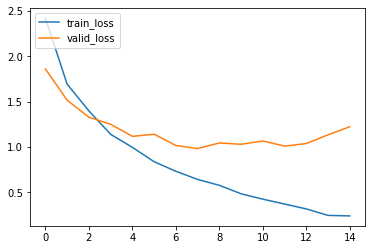

In [15]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label = 'train_loss')
plt.plot(valid_loss, label = 'valid_loss')
plt.legend(loc = 'upper left')

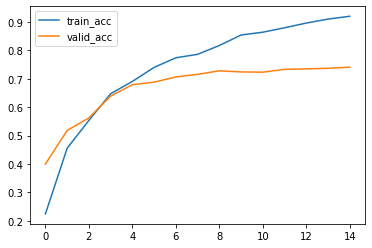

In [16]:
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend(loc = 'upper left')

* 최적의 모델 로드

In [17]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

---

## Step 7: Predict with Test Data 


### 예시 코드를 제공해 드립니다. 필요한 부분을 채워 사용하시거나 직접 코드를 작성 하셔도 됩니다

In [18]:
class test_dataset(Dataset):
    def __init__(self,imgpath,transform=None):
        
        self.imgpath = imgpath
        self.transform = transform
        
    def __len__(self):
        return len(self.imgpath)
    
    def __getitem__(self,idx):
        x = self.transform(Image.open(self.imgpath[idx]).convert('RGB'))
        
        return x

In [19]:
test_transform = transforms.Compose([      # sequential하게 다양한 transform 설정
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

### test dataset과 dataloader 생성


In [20]:
test_set = sorted(glob.glob('./detect-the-bird/imgs/test/*'))

test_data = test_dataset(test_set,transform = test_transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, 
                                          shuffle=False, 
                                          num_workers=num_workers)

### Predict 수행

In [21]:
pred=[]

In [22]:
#코드작성(Test)
# pred 리스트 안에 Test image 순서대로 예측한 class index가 저장되도록 코드를 작성하시면 됩니다.


model.eval()
# iterate over test data
for data in test_loader:
    # move tensors to GPU if CUDA is available
    data = data.to(device)
    
    # forward pass: compute predicted outputs by passing inputs to the model
    logits = model(data)    
    ps = F.softmax(logits, dim=1)
    top_p, top_class = ps.topk(1, dim=1)
    
    pred += top_class.flatten().tolist()

예측 결과 인덱스를 저장한 pred 값을 사용해 클래스를 매칭하기 위한 class_name을 담아 놓은 리스트입니다.

주의할 점은 Train과정에서 사용된 class lable값과 같은 순서로 저장이 되어 있어야 한다는 점입니다


In [23]:
id=[]
category =[]
for i in range(len(test_set)):
    id.append(test_set[i].split('/')[-1])
    category.append(classes[pred[i]])
pd.DataFrame({'Id':id,'Category':category}).to_csv('submission.csv',index=False)

---